In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

In [21]:
def _importData():
    global ds
    ds = pd.read_csv('diabetes_pp.csv')
    
_importData()
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,60,23,94,28.1,0.167,21,0
4,0,137,40,35,50,28.0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
def _preprocess():
    median_insulin = ds.loc[ds['Insulin'] != 0, 'Insulin'].median()
    ds.replace({'Insulin': {0: None}}, inplace=True)
    ds['Insulin'] = ds['Insulin'].fillna(median_insulin.item())

    median_skin_thickness = ds.loc[ds['SkinThickness'] != 0, 'SkinThickness'].median()
    ds.replace({'SkinThickness': {0: None}}, inplace=True)
    ds['SkinThickness'] = ds['SkinThickness'].fillna(median_skin_thickness.item()).infer_objects(copy=False)

    mode_bmi = ds.loc[ds['BMI'] != 0, 'BMI'].mode().iloc[0]
    ds.replace({'BMI': {0: None}}, inplace=True)
    ds['BMI'] = ds['BMI'].fillna(mode_bmi)

    ds.drop_duplicates(inplace=True)
    
    return ds

_preprocess()

C:\Users\edorj\AppData\Local\Temp\ipykernel_4220\1138515944.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['Insulin'] = ds['Insulin'].fillna(median_insulin.item())
C:\Users\edorj\AppData\Local\Temp\ipykernel_4220\1138515944.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['SkinThickness'] = ds['SkinThickness'].fillna(median_skin_thickness.item()).infer_objects(copy=False)
C:\Users\edorj\AppData\Local\Temp\ipykernel_4220\1138515944.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,125.0,33.6,0.627,50,1
1,1,85,66,29.0,125.0,26.6,0.351,31,0
2,8,183,64,29.0,125.0,23.3,0.672,32,1
3,1,89,60,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,50.0,28.0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,125.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,29.0,125.0,30.1,0.349,47,1


In [23]:
def _prepare():
    global x, y
    y = ds['Outcome']
    x = ds.drop('Outcome', axis = 1)
_prepare()

In [24]:
def _split(size):
    global x_train, x_test, y_train, y_test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size)
_split(0.2)

In [25]:
def _createModel():
    global dt_model
    dt_model = DecisionTreeClassifier(criterion='entropy')
_createModel()

In [26]:
def _fit():
    dt_model.fit(x_train, y_train)
_fit()

In [27]:
def _predict():
    global y_pred
    y_pred = dt_model.predict(x_test)
_predict()

In [28]:
def _report():
    report = classification_report(y_test, y_pred)
    print(report)
_report()

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        94
           1       0.60      0.63      0.62        60

    accuracy                           0.69       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.69      0.70       154



[[69 25]
 [22 38]]


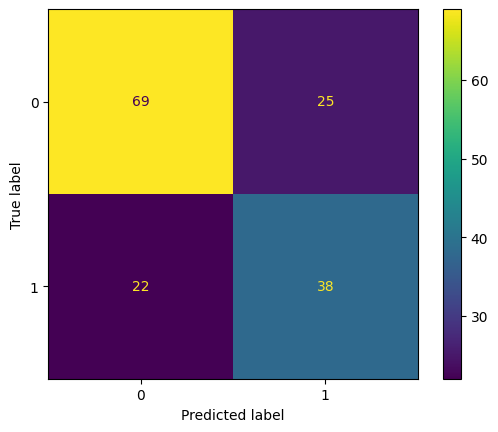

In [29]:
def _conf_matrix():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    print(cm)
_conf_matrix()

In [30]:
def _drawTree():
    class_names = y.astype(str).unique().tolist()

    dot_file = export_graphviz(dt_model, out_file='diabetes.dot', 
                           feature_names=x.columns,
                           class_names=class_names,  
                           filled=True)
_drawTree()